# LAB | Intro to Machine Learning

**Load the data**

In this challenge, we will be working with Spaceship Titanic data. The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

In [248]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [249]:
spaceship = pd.read_csv("spaceship_titanic.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


**Check the shape of your data**

In [250]:
#your code here
spaceship.shape

(8693, 14)

**Check for data types**

In [251]:
# check data types
spaceship.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

**Check for missing values**

In [252]:
# Convert boolean columnn `Transported` to integer 1 or 0
spaceship['Transported'] = spaceship['Transported'].astype(int)

# check data types
spaceship.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported       int32
dtype: object

In [253]:
# check missing values for each column
spaceship.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

There are multiple strategies to handle missing data

- Removing all rows or all columns containing missing data.
- Filling all missing values with a value (mean in continouos or mode in categorical for example).
- Filling all missing values with an algorithm.

For this exercise, because we have such low amount of null values, we will drop rows containing any missing value. 

In [254]:
# we will drop rows containing any missing values:
spaceship = spaceship.dropna()

spaceship.shape 

(6606, 14)

In [255]:
# Seleccionamos solo las variables numéricas
spaceship = spaceship.select_dtypes(include=[np.number])

spaceship.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,39.0,0.0,0.0,0.0,0.0,0.0,0
1,24.0,109.0,9.0,25.0,549.0,44.0,1
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0
4,16.0,303.0,70.0,151.0,565.0,2.0,1


In [256]:
spaceship.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Age,6606.0,28.894036,14.533429,0.0,19.0,27.0,38.00,79.0
RoomService,6606.0,222.991674,644.987936,0.0,0.0,0.0,49.00,9920.0
FoodCourt,6606.0,478.958523,1678.592291,0.0,0.0,0.0,82.75,29813.0
ShoppingMall,6606.0,178.356494,576.328407,0.0,0.0,0.0,30.00,12253.0
Spa,6606.0,313.161520,1144.016291,0.0,0.0,0.0,65.00,22408.0
VRDeck,6606.0,303.780048,1127.142166,0.0,0.0,0.0,52.00,20336.0
Transported,6606.0,0.503633,0.500025,0.0,0.0,1.0,1.00,1.0


**KNN**

K Nearest Neighbors is a distance based algorithm, and requeries all **input data to be numerical.**

Let's only select numerical columns as our features.

In [257]:
# Split the data into X and y
X = spaceship.drop('Transported', axis=1)

And also lets define our target.

In [258]:
# And also lets define our target.
y = spaceship["Transported"]

**Train Test Split**

Now that we have split the data into **features** and **target** variables and imported the **train_test_split** function, split X and y into X_train, X_test, y_train, and y_test. 80% of the data should be in the training set and 20% in the test set.

In [259]:
# split the data into **features** and **target** variables and imported the **train_test_split** function, split X and y into X_train, X_test, y_train, and y_test. 80% of the data should be in the training set and 20% in the test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# check the shape of the resulting dataframes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5284, 6), (1322, 6), (5284,), (1322,))

In [260]:
X_train.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
7832,25.0,0.0,1673.0,0.0,642.0,612.0
5842,36.0,0.0,2624.0,1657.0,2799.0,1.0
3928,34.0,0.0,0.0,0.0,0.0,0.0
4091,37.0,0.0,0.0,0.0,0.0,0.0
7679,22.0,0.0,0.0,0.0,0.0,0.0


In [261]:
y_train.head()

7832    0
5842    0
3928    1
4091    1
7679    1
Name: Transported, dtype: int32

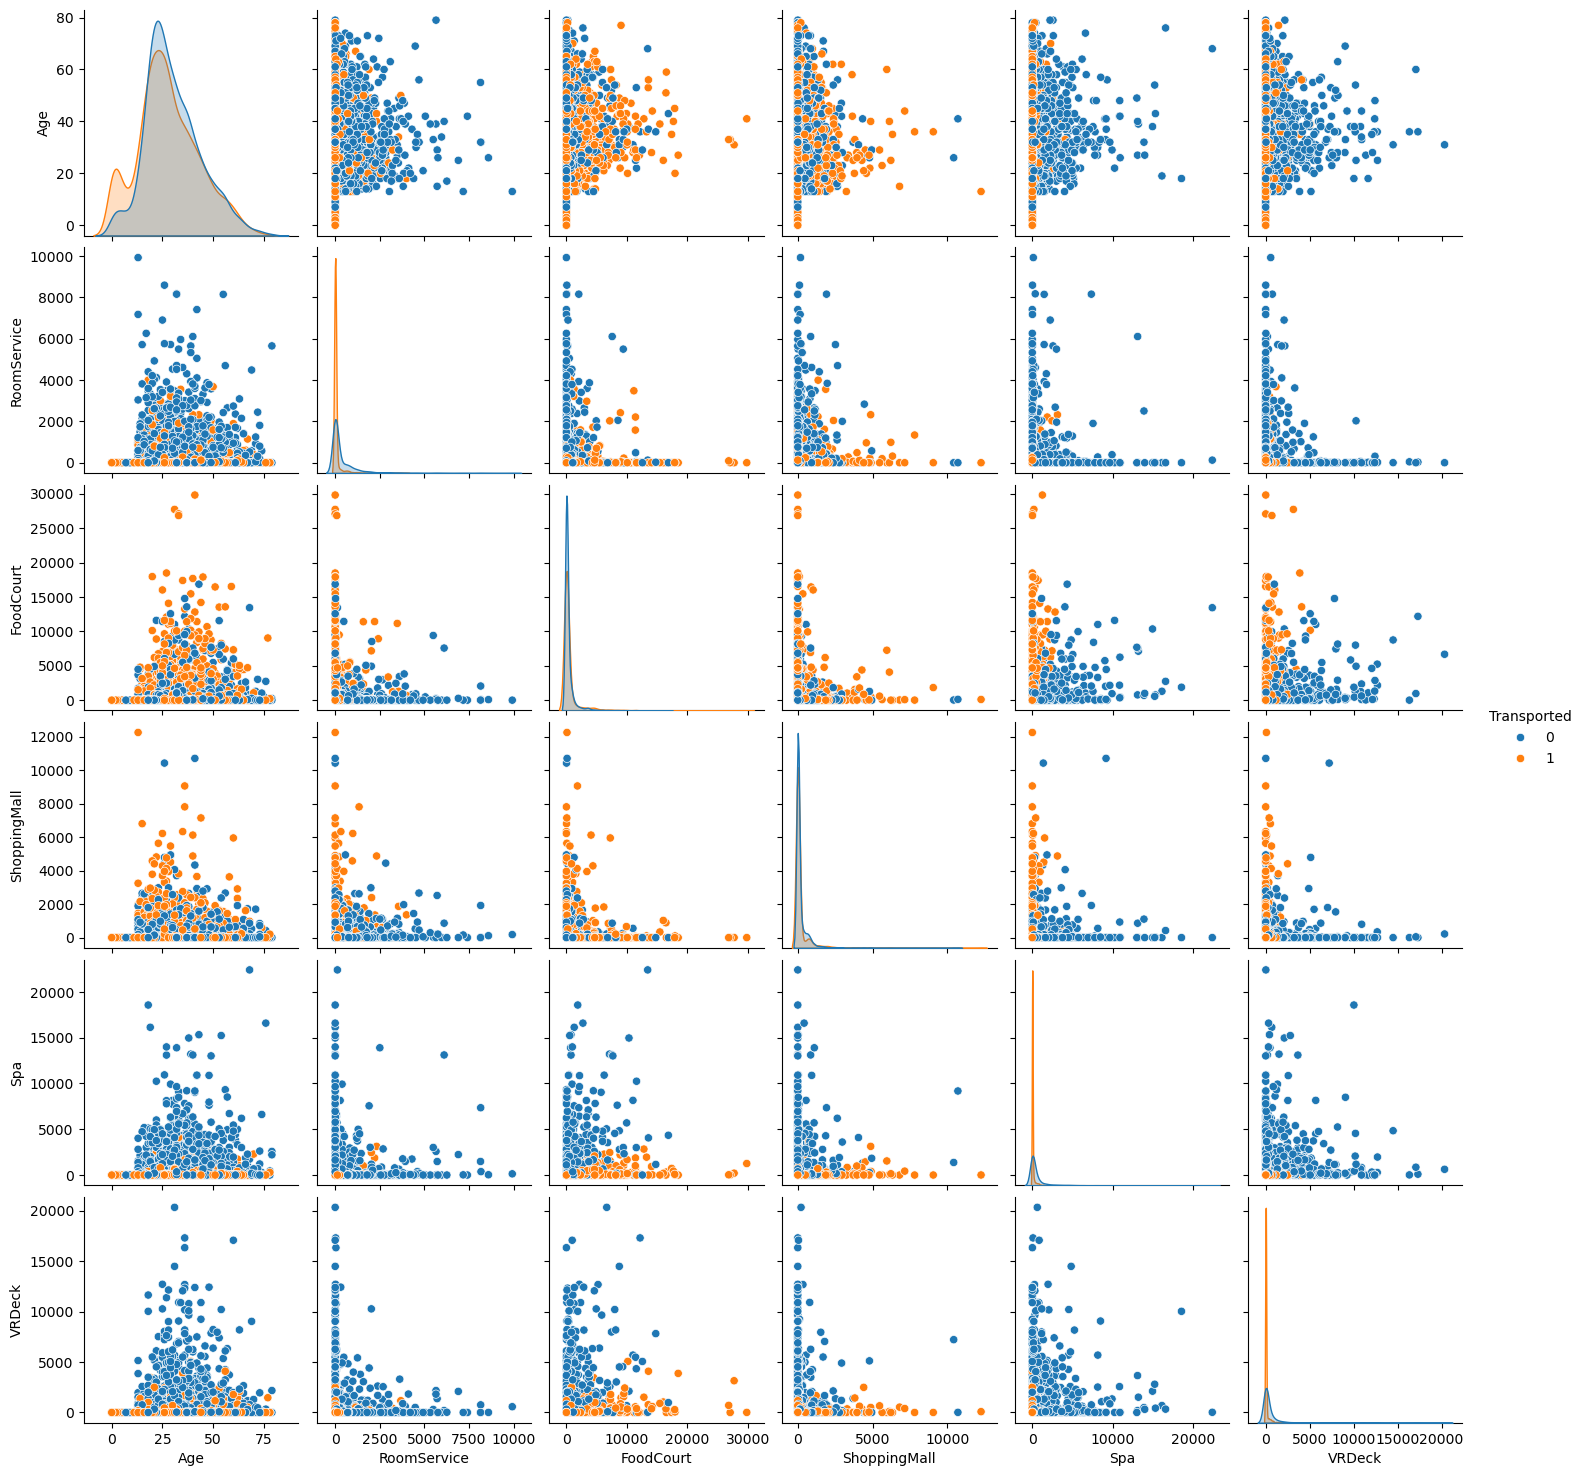

In [262]:
sns.pairplot(spaceship, hue="Transported")
plt.show()

**Model Selection**

In this exercise we will be using **KNN** as our predictive model.

You need to choose between **Classificator** or **Regressor**. Take into consideration target variable to decide.

Initialize a KNN instance without setting any hyperparameter.

In [263]:
#your code here
#from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

Fit the model to your data.

In [264]:
#your code here
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Evaluate your model.

In [265]:
#your code here

# Hacer predicciones
y_pred = knn.predict(X_test)

score = knn.score(X_test, y_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Score: {score:.2f}')
print(f'Accuracy: {accuracy:.2f}')

Score: 0.76
Accuracy: 0.76


**Congratulations, you have just developed your first Machine Learning model!**

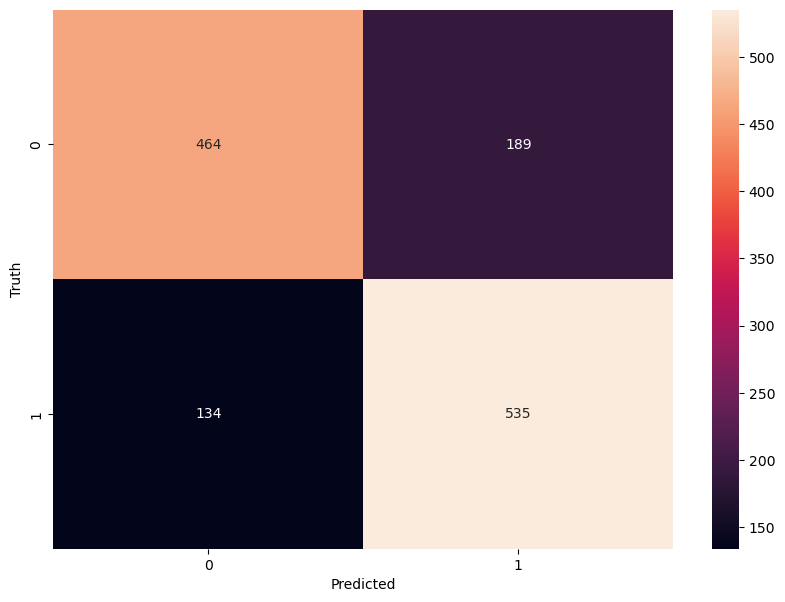

In [266]:
# Obtener las etiquetas originales
label_encoder = LabelEncoder()
label_encoder.fit(y_test)
labels = label_encoder.classes_

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Plotear la matriz de confusión
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


In [267]:
# Classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.78      0.71      0.74       653
           1       0.74      0.80      0.77       669

    accuracy                           0.76      1322
   macro avg       0.76      0.76      0.75      1322
weighted avg       0.76      0.76      0.76      1322

